In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

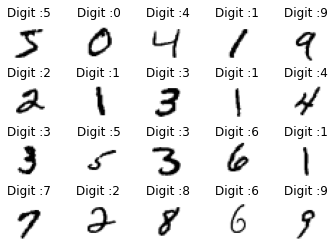

In [9]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit :{}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

Text(0.5, 0, 'Intensity')

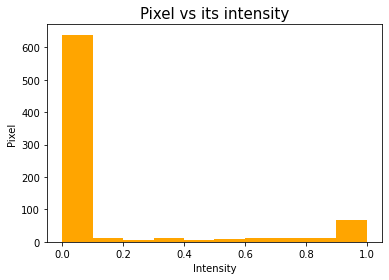

In [18]:
# print(train_img.shape)
# print(test_img.shape)
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity', fontsize=15)
plt.ylabel('Pixel')
plt.xlabel('Intensity')

train_img=train_img/255.0
test_img=test_img/255.0

In [19]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512, activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512, activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_img, train_lab, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 30s 8ms/step - loss: 0.3140 - accuracy: 0.9052
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0821 - accuracy: 0.9735
Epoch 3/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0535 - accuracy: 0.9835
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0419 - accuracy: 0.9865
Epoch 5/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0307 - accuracy: 0.9903
Epoch 6/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0266 - accuracy: 0.9912
Epoch 7/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0205 - accuracy: 0.9936
Epoch 8/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0206 - accuracy: 0.9941
Epoch 9/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0182 - accuracy: 0.9947
Epoch 10/100
1875/1875 [==============================] - 15s 8m

In [22]:
model.save('project.h5')
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - loss: 0.4898 - accuracy: 0.9822
Test Loss 0.4898218810558319
Test Accuracy 0.982200026512146


Predicted Value:  7
I predicted right!


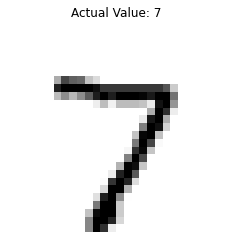

In [23]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==np.argmax(prediction[0])):
  print('I predicted right!')
else:
  print('Better luck next time!')

In [38]:
#making prediction for novel image data
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

#load and prepare image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = np.array(img).reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [34]:
from google.colab import files
uploaded=files.upload()

Saving four.jpg to four.jpg


In [40]:
from IPython.display import Image
Image('four.jpg', width=250, height=250)
#four.jpg being the file name.
img=load_image('four.jpg')
digit=model.predict(img)
print('Predicted Value: ',np.argmax(digit))

Predicted Value:  4


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
# from google.colab import files
# uploaded = files.upload()
# model=tf.keras.models.load_model(‘project.h5’)
# https://colab.research.google.com/drive/10LzhqSlJx4bnCNT6C8llhuXTDuh_WQPG?usp=sharing